### Librerias

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

### Parametros de la distribucion Poisson

In [7]:
# Parámetro de la distribución Poisson
mu = 5

# Rango de valores para la distribución original
x = np.arange(0, 16)
pmf_original = poisson.pmf(x, mu)

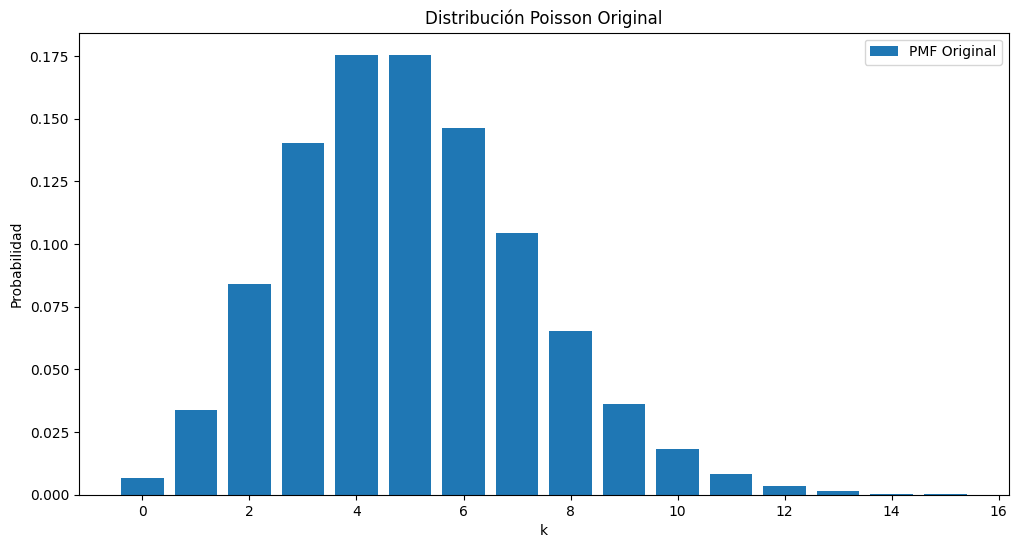

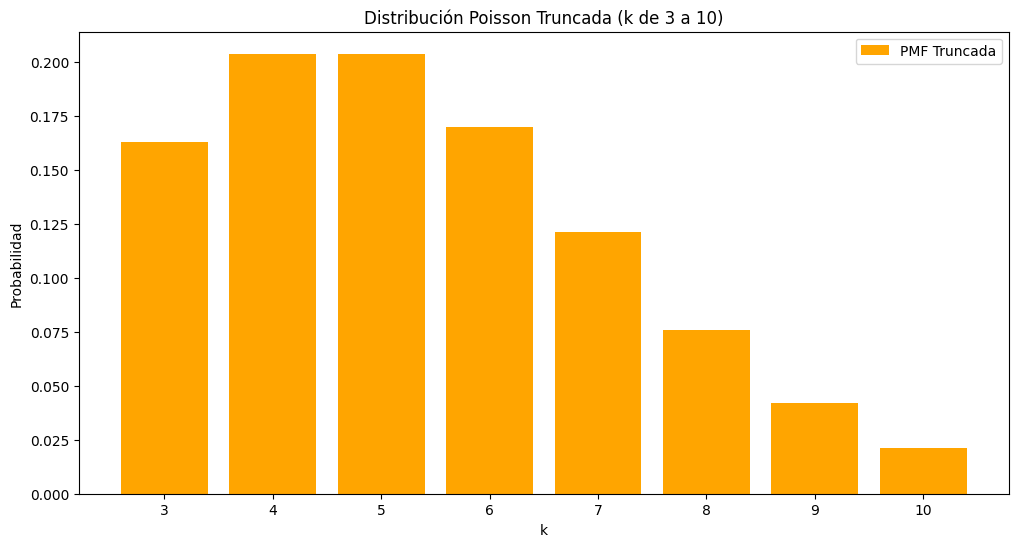

In [8]:
# Graficar la PMF original
plt.figure(figsize=(12, 6))
plt.bar(x, pmf_original, label="PMF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento, por ejemplo, de k = 3 a k = 10
k_min = 3
k_max = 10
x_trunc = np.arange(k_min, k_max + 1)

# Calcular la constante de normalización: suma de las probabilidades en el intervalo de truncamiento
norm_const = np.sum(poisson.pmf(x_trunc, mu))

# Crear la PMF truncada re-normalizada
pmf_trunc = poisson.pmf(x_trunc, mu) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.bar(x_trunc, pmf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()


In [9]:
# Calcular la probabilidad en la Poisson original para k entre 4 y 8
k_event = np.arange(4, 9)  # 4, 5, 6, 7 y 8
p_original = poisson.pmf(k_event, mu).sum()
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

# Calcular la probabilidad en la Poisson truncada para k entre 4 y 8
# norm_const ya contiene la suma de las PMF en el intervalo truncado [k_min, k_max] (en este caso 3 a 10)
p_event = poisson.pmf(k_event, mu).sum()
p_trunc = p_event / norm_const
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_trunc)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807893
Probabilidad en Poisson truncada (k entre 4 y 8): 0.7739550293945333
